In [1]:
from imports import *

In [3]:
# sf = datasets.fetch_kddcup99(subset='SF', random_state=0, percent10=False)
# dfsf = pd.DataFrame(sf.data, columns=sf_columns)
df = pd.read_csv('kddcup.data', delimiter=',')
df.columns = sa_columns + ["target"]

df_normal = df[df["target"]== 'normal.']
df_attacks = df[df["target"]!= 'normal.']

target_anomaly_rate = 0.1
df_attacks = df_attacks.sample(n = int(len(df_normal)*target_anomaly_rate), random_state=1)

df_train = df_normal.append(df_attacks)
anomaly_rate = 1.0 - len(df_train.loc[df_train["target"]=='normal.'])/len(df_train)
print(f"anomaly rate is {anomaly_rate:.1%}")

df_train['binary_target'] = [1 if x=='normal.' else -1 for x in df_train["target"]]
df_train = df_train.sample(frac=1, random_state=2)
toDecode = ["protocol_type", "service", "flag", "target"]
leSF = preprocessing.LabelEncoder()
for f in toDecode:
    df_train[f] = leSF.fit_transform(df_train[f])

x_train, x_test, y_train, y_test = train_test_split(df_train.drop(["target", 'binary_target'], axis=1), df_train['binary_target'], test_size=0.33, random_state=0)
results = []

anomaly rate is 9.1%


In [7]:
def cross_validation(contamination):
    highest_score = 0
    highest_score_c = 0
    #print("array:", contamination)
    for c in contamination:
        y_pred = IsolationForest(random_state=1, n_jobs=-1, max_samples=0.25, n_estimators=100, contamination=c).fit(x_train).predict(x_test)
        p, r, f, s = map(lambda x: x[0], precision_recall_fscore_support(y_test, y_pred, labels=[-1]))
        if p + r > highest_score: highest_score = p+r; highest_score_c = c
        fp = s / p - s
        print(f"contamination: {c}, AUC : {roc_auc_score(y_test, y_pred):.1}, precision: {p}, support: {s}, recall: {r}, fp: {int(round(fp, 0))}")
    return highest_score_c

In [9]:
contamination = [round(0.01 + 0.01*i, 2) for i in range(10)]
c_max = cross_validation(contamination)
c_max

contamination: 0.01, AUC : 0.5, precision: 0.38575498575498574, support: 32011, recall: 0.0422979600762238, fp: 50972
contamination: 0.02, AUC : 0.5, precision: 0.39752348420153716, support: 32011, recall: 0.08725125738027553, fp: 48515
contamination: 0.03, AUC : 0.6, precision: 0.3755014460304133, support: 32011, recall: 0.12573802755302865, fp: 53238
contamination: 0.04, AUC : 0.6, precision: 0.381508584294962, support: 32011, recall: 0.16937927587391835, fp: 51895
contamination: 0.05, AUC : 0.6, precision: 0.37067890740111076, support: 32011, recall: 0.2043360094967355, fp: 54347
contamination: 0.06, AUC : 0.6, precision: 0.37634968744080316, support: 32011, recall: 0.2482584111711599, fp: 53046
contamination: 0.07, AUC : 0.6, precision: 0.3729690108726636, support: 32011, recall: 0.2861203961138359, fp: 53817
contamination: 0.08, AUC : 0.6, precision: 0.3655368234250222, support: 32011, recall: 0.32173315422823406, fp: 55562
contamination: 0.09, AUC : 0.6, precision: 0.342328961921

0.08

In [10]:
contamination = [round(0.1*i, 1) for i in range(1, 7)]
c_max = cross_validation(contamination)
c_max

contamination: 0.1, AUC : 0.6, precision: 0.3086433821434676, support: 32011, recall: 0.3384461591327981, fp: 71704
contamination: 0.2, AUC : 0.7, precision: 0.22933344628460897, support: 32011, recall: 0.5074193246071663, fp: 107572
contamination: 0.3, AUC : 0.9, precision: 0.3008392936023835, support: 32011, recall: 0.9999375214769923, fp: 74395
contamination: 0.4, AUC : 0.8, precision: 0.22606478767805313, support: 32011, recall: 1.0, fp: 109590
contamination: 0.5, AUC : 0.8, precision: 0.18133564456831455, support: 32011, recall: 1.0, fp: 144518
contamination: 0.6, AUC : 0.7, precision: 0.1506619789239842, support: 32011, recall: 1.0, fp: 180458


0.3

In [11]:
contamination = [round(c_max - 0.1 + 0.01*i, 2) for i in range(11)]
c_max = cross_validation(contamination)
c_max

contamination: 0.2, AUC : 0.7, precision: 0.22933344628460897, support: 32011, recall: 0.5074193246071663, fp: 107572
contamination: 0.21, AUC : 0.7, precision: 0.22339416108582352, support: 32011, recall: 0.507481803130174, fp: 111283
contamination: 0.22, AUC : 0.7, precision: 0.22339416108582352, support: 32011, recall: 0.507481803130174, fp: 111283
contamination: 0.23, AUC : 0.7, precision: 0.22339416108582352, support: 32011, recall: 0.507481803130174, fp: 111283
contamination: 0.24, AUC : 0.7, precision: 0.22339416108582352, support: 32011, recall: 0.507481803130174, fp: 111283
contamination: 0.25, AUC : 0.9, precision: 0.361494499536922, support: 32011, recall: 0.9998438036924807, fp: 56541
contamination: 0.26, AUC : 0.9, precision: 0.34737778935486674, support: 32011, recall: 0.9998438036924807, fp: 60139
contamination: 0.27, AUC : 0.9, precision: 0.33392801251956183, support: 32011, recall: 0.9998750429539845, fp: 63851
contamination: 0.28, AUC : 0.9, precision: 0.3222970727728

0.25

AUC: 91.2%
              precision    recall  f1-score   support

          -1       0.36      1.00      0.53     32011
           1       1.00      0.82      0.90    321109

    accuracy                           0.84    353120
   macro avg       0.68      0.91      0.72    353120
weighted avg       0.94      0.84      0.87    353120



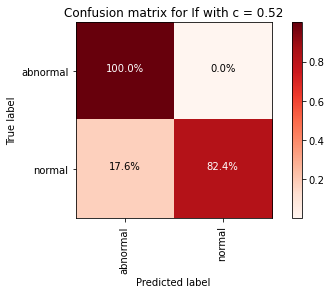

In [4]:
y_pred = IsolationForest(random_state=1, n_jobs=-1, max_samples=0.25, n_estimators=100, contamination=0.25).fit(x_train).predict(x_test)
cm_if = confusion_matrix(y_test, y_pred)
print(f"AUC: {roc_auc_score(y_test, y_pred):.1%}")
print(classification_report(y_test, y_pred))
plot_confusion_matrix(cm_if, f"Confusion matrix for If with c = {0.52}")

## Experiment with slight variation in anomaly rate
By increasing the amount of malicious data trained for our model, we can expect to reduce the fp/tp ratio and thus, 

In [5]:
# sf = datasets.fetch_kddcup99(subset='SF', random_state=0, percent10=False)
# dfsf = pd.DataFrame(sf.data, columns=sf_columns)
df = pd.read_csv('kddcup.data', delimiter=',')
df.columns = sa_columns + ["target"]

df_normal = df[df["target"]== 'normal.']
df_attacks = df[df["target"]!= 'normal.']

target_anomaly_rate = 0.2
df_attacks = df_attacks.sample(n = int(len(df_normal)*target_anomaly_rate), random_state=1)

df_train = df_normal.append(df_attacks)
anomaly_rate = 1.0 - len(df_train.loc[df_train["target"]=='normal.'])/len(df_train)
print(f"anomaly rate is {anomaly_rate:.1%}")

df_train['binary_target'] = [1 if x=='normal.' else -1 for x in df_train["target"]]
df_train = df_train.sample(frac=1, random_state=2)
toDecode = ["protocol_type", "service", "flag", "target"]
leSF = preprocessing.LabelEncoder()
for f in toDecode:
    df_train[f] = leSF.fit_transform(df_train[f])

x_train, x_test, y_train, y_test = train_test_split(df_train.drop(["target", 'binary_target'], axis=1), df_train['binary_target'], test_size=0.33, random_state=0)
results = []

anomaly rate is 16.7%


In [ ]:
contamination = [round(0.1*i, 1) for i in range(1, 7)]
c_max = cross_validation(contamination)
c_max

contamination: 0.1, AUC : 0.5, precision: 0.28236776466352953, support: 63899, recall: 0.17184932471556674, fp: 162398
contamination: 0.2, AUC : 0.6, precision: 0.2810085767717805, support: 63899, recall: 0.34097560212209893, fp: 163493
contamination: 0.3, AUC : 0.6, precision: 0.24821299352265305, support: 63899, recall: 0.44017903253572044, fp: 193537
